In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
#unzipping the training data
!unzip 'drive/MyDrive/dataset/train.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/1674.wav          
  inflating: Train/1675.wav          
  inflating: Train/1677.wav          
  inflating: Train/1678.wav          
  inflating: Train/1679.wav          
  inflating: Train/168.wav           
  inflating: Train/1680.wav          
  inflating: Train/1681.wav          
  inflating: Train/1686.wav          
  inflating: Train/1687.wav          
  inflating: Train/1688.wav          
  inflating: Train/1689.wav          
  inflating: Train/1690.wav          
  inflating: Train/1695.wav          
  inflating: Train/1697.wav          
  inflating: Train/1699.wav          
  inflating: Train/17.wav            
  inflating: Train/170.wav           
  inflating: Train/1701.wav          
  inflating: Train/1702.wav          
  inflating: Train/1703.wav          
  inflating: Train/1704.wav          
  inflating: Train/1705.wav          
  inflating: Train/1706.wav          
  inflating: Train/1708.wav          

In [ ]:
#unzipping the testing data
!unzip 'drive/MyDrive/dataset/test.zip'

Archive:  drive/MyDrive/dataset/test.zip
   creating: Test/
  inflating: test.csv                
  inflating: Test/1002.wav           
  inflating: Test/1005.wav           
  inflating: Test/1009.wav           
  inflating: Test/1010.wav           
  inflating: Test/1011.wav           
  inflating: Test/1012.wav           
  inflating: Test/1013.wav           
  inflating: Test/1016.wav           
  inflating: Test/1019.wav           
  inflating: Test/102.wav            
  inflating: Test/1020.wav           
  inflating: Test/1023.wav           
  inflating: Test/1031.wav           
  inflating: Test/1033.wav           
  inflating: Test/1035.wav           
  inflating: Test/1037.wav           
  inflating: Test/1039.wav           
  inflating: Test/1041.wav           
  inflating: Test/1046.wav           
  inflating: Test/1050.wav           
  inflating: Test/1053.wav           
  inflating: Test/1057.wav           
  inflating: Test/106.wav            
  inflating: Test/1060.wav  

In [ ]:
#importing the all the relevant libraries
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
%pylab inline

import warnings 
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
  #reading the csv file containg the class labels and ID of each sound in the training dataset
  df = pd.read_csv('Urban Sound Dataset.csv')
  df.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [ ]:
#reading the csv file containing the ID of each sound in the test dataset
df_test = pd.read_csv('urban test.csv')
df_test.head()

,ID
0,5
1,7
2,8
3,9
4,13


In [ ]:
#trying to listen to the audio file using the Ipython library
ipd.Audio('Test/5.wav')

In [ ]:
test_data, test_sampling_rate = librosa.load('Test/5.wav')
test_sampling_rate

22050

In [ ]:
 ipd.Audio('Train/1.wav')

In [ ]:
#loading the audio file and converting it into an array
#sampling rate is the number of splits per second
data, sampling_rate = librosa.load('Train/1.wav')

In [ ]:
data

array([-0.09602016, -0.14303702,  0.05203498, ..., -0.01646687,
       -0.00915894,  0.09742922], dtype=float32)

In [ ]:
sampling_rate

22050

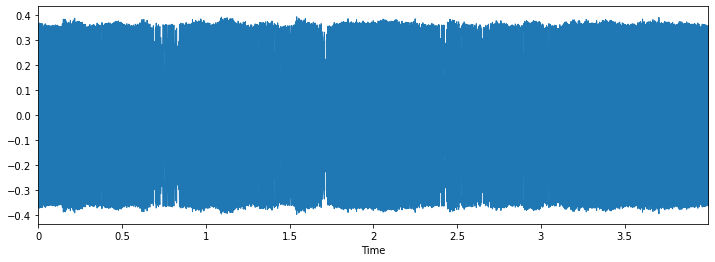

In [ ]:
#visualising the graph(waveplot) for street music
plt.figure(figsize = (12,4))
librosa.display.waveplot(data,sr=sampling_rate)

Class: siren


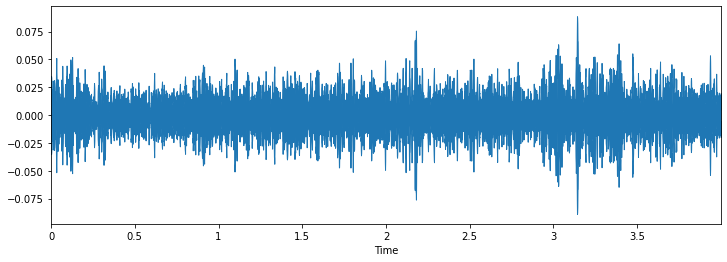

In [ ]:
#visualising the graphs for a random sound selected from the training dataset
import random
index = random.choice(df.index)      #randomly selecting a value from the index values present in the dataset
print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize = (12,4))
librosa.display.waveplot(data, sr = sampling_rate)

Class: street_music


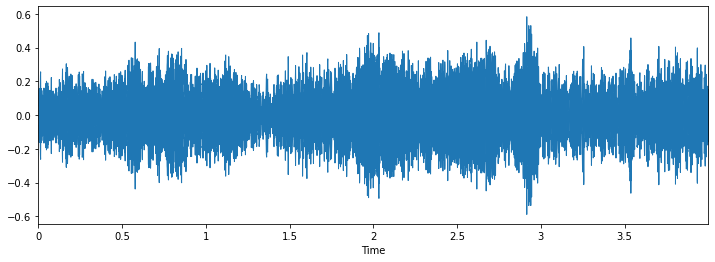

In [ ]:
index = random.choice(df.index)
print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize = (12,4))
librosa.display.waveplot(data, sr = sampling_rate)

Class: dog_bark


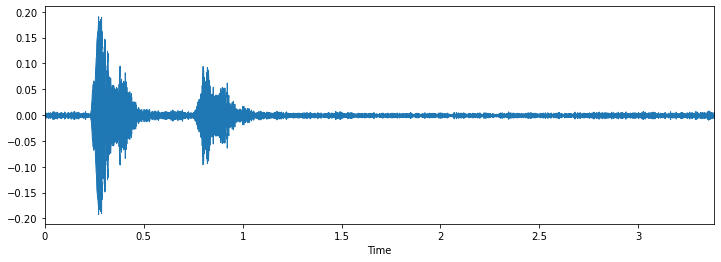

In [ ]:
index = random.choice(df.index)
print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize = (12,4))
librosa.display.waveplot(data, sr = sampling_rate)

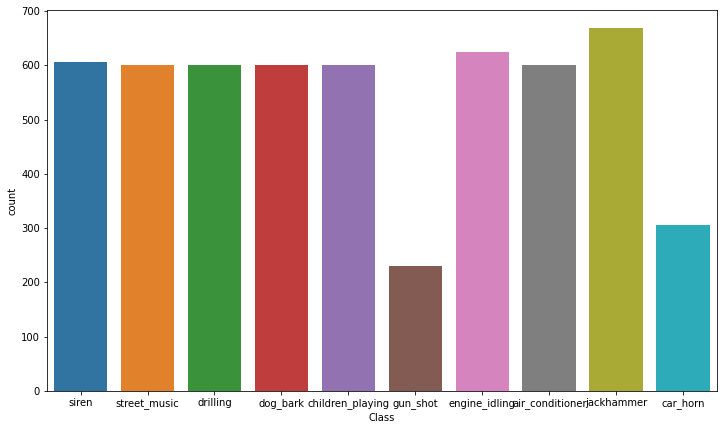

In [ ]:
#visualising class distribution
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df['Class'])
#apart from gunshot and car horn all the other classes have somewhat uniform distribution

In [ ]:
#defining a function parser to load the audio files and convert it into an array so that we can directly load our dataset to our neural network model
import os
def parser(row):
  file_name = os.path.join('Train', str(row.ID) + '.wav')
  #loading the audio file
  x, sample_rate = librosa.load(file_name,res_type = 'kaiser_fast')
  #extracting features from the data
  #we have taken number of features as 40
  #axis = 0 indicates that we are taking features as 0
  mfccs = np.mean(librosa.feature.mfcc(y = x, sr = sample_rate, n_mfcc = 40).T, axis = 0)    #mfcc is called as mel frequency cepstral coeffecients which is used to extract features from audio files

  feature = mfccs
  label = row.Class

  return [feature, label] 

In [ ]:
#applying the parser function on the train data
data = df.apply(parser, axis = 1)
data.columns = ['feature', 'label']

In [ ]:
 data[0]

[array([-82.12359   , 139.50592   , -42.430866  ,  24.82786   ,
        -11.620764  ,  23.497084  , -12.19459   ,  25.897139  ,
         -9.405277  ,  21.21043   ,  -7.3688216 ,  14.254338  ,
         -8.6786995 ,   7.7502384 , -10.124115  ,   3.258119  ,
        -11.352619  ,   2.8009686 ,  -7.0460134 ,   3.9133134 ,
         -2.3349748 ,   2.0124226 ,  -2.793944  ,   4.1292744 ,
         -1.6207688 ,   4.3262014 ,  -1.0344098 ,  -1.2329768 ,
         -3.1108537 ,   0.3204486 ,  -1.7877866 ,   0.44295514,
         -1.7916478 ,  -0.76361805,  -1.2424643 ,  -0.27664027,
          0.65718526,  -0.5023713 ,  -2.6042857 ,  -1.0534623 ],
       dtype=float32), 'siren']

In [ ]:
#input split
X = np.array(list(zip(*data))[0])
y = np.array(list(zip(*data))[1])

In [ ]:
#converting the categories to numerical categories
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y = np_utils.to_categorical(le.fit_transform(y))

In [ ]:
y.shape

(5435, 10)

In [ ]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
#creating our model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 10

model = Sequential()

model.add(Dense(256, input_shape = (40,)))    #input shape is required in the first layer
model.add(Activation('relu'))
model.add(Dropout(0.3))                        #dropout added to avoid overfitting

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')            #categorical crossentropy is used since we have multiple classes
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [ ]:
model.fit(X, y, batch_size = 32, epochs = 50, validation_split = 0.25)

Epoch 1/50
128/128 [==============================] - 2s 8ms/step - loss: 9.4479 - accuracy: 0.1868 - val_loss: 2.1087 - val_accuracy: 0.2303
Epoch 2/50
128/128 [==============================] - 1s 5ms/step - loss: 2.1598 - accuracy: 0.2508 - val_loss: 1.8816 - val_accuracy: 0.3709
Epoch 3/50
128/128 [==============================] - 1s 5ms/step - loss: 1.9260 - accuracy: 0.3137 - val_loss: 1.6946 - val_accuracy: 0.4496
Epoch 4/50
128/128 [==============================] - 1s 5ms/step - loss: 1.7455 - accuracy: 0.3719 - val_loss: 1.4684 - val_accuracy: 0.4945
Epoch 5/50
128/128 [==============================] - 1s 5ms/step - loss: 1.5655 - accuracy: 0.4439 - val_loss: 1.3032 - val_accuracy: 0.5813
Epoch 6/50
128/128 [==============================] - 1s 5ms/step - loss: 1.4294 - accuracy: 0.5037 - val_loss: 1.1722 - val_accuracy: 0.6365
Epoch 7/50
128/128 [==============================] - 1s 5ms/step - loss: 1.2644 - accuracy: 0.5676 - val_loss: 1.0981 - val_accuracy: 0.6372
Epoch 

In [ ]:
#creating a function to load our test audio to predict the classes of the test dataset
def parser_test(row):
  testfile_name = os.path.join('Test', str(row.ID) + '.wav')
  #loading the audio file
  a, testsample_rate = librosa.load(testfile_name,res_type = 'kaiser_fast')
  #extracting features from the data
  mfccs = np.mean(librosa.feature.mfcc(y = a, sr = testsample_rate, n_mfcc = 40).T, axis = 0)

  feature = mfccs

  return [feature] 

In [ ]:
#applying the parser function on test dataset
test_data = df_test.apply(parser_test, axis = 1)
test_data.columns = ['feature']

In [ ]:
test_data[0]

[array([-76.29928   ,  20.437246  , -17.566017  ,  26.387783  ,
        -22.764183  ,  16.67028   , -20.356012  ,  12.797761  ,
        -13.740047  ,   8.020206  , -16.762907  ,  15.398877  ,
        -23.845572  ,  14.435514  , -20.161509  ,   8.576477  ,
         -4.3703156 ,   3.3193142 ,   6.07897   ,   1.1731472 ,
          4.100645  ,   5.286641  ,  -4.984763  ,   8.798998  ,
         -2.7138798 ,   6.731222  ,   0.5381037 ,   4.4297953 ,
          4.368756  ,   0.9185511 ,   0.21240357,   4.1925063 ,
         -3.5331562 ,   3.16333   ,  -0.5510365 ,   0.43360093,
         -3.7822633 ,   0.575977  ,  -4.7288184 ,   4.023563  ],
       dtype=float32)]

In [ ]:
test_x = np.array(list(zip(*test_data))[0])

In [ ]:
#predicting the classes using predict_classes
test_y = model.predict_classes(test_x)

In [ ]:
test_y

array([4, 3, 4, ..., 7, 3, 8])

In [ ]:
#retransforming the numerical categories back to text categories
classes = le.inverse_transform(test_y)
classes

array(['drilling', 'dog_bark', 'drilling', ..., 'jackhammer', 'dog_bark',
       'siren'], dtype='<U16')

In [ ]:
ipd.Audio('Test/8.wav')

In [ ]:
np.savetxt('submission_3.csv', np_class, delimiter=',', fmt = '%s')

In [ ]:
np_class = np.array(classes)

In [ ]:
m = pd.read_csv('submission_2.csv')
m['Class'] = np_class
m.head()

,Class,ID
0,drilling,5
1,dog_bark,7
2,drilling,8
3,children_playing,9
4,engine_idling,13
